This item concerns driver behaviour recognition (specifically, the normal, labelled as “1”, and abnormal driving behaviours, labelled as “2”) using data collected in 2016 by using a smartphone app DriveSafe for the purpose of deep driving behaviour analysis. The app can capture vehicle-related measurements such as speed, acceleration, gyroscope, and driver status (normal or abnormal).

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

bringing in all of the necessary libraries

In [11]:
X_train_dataset = pd.read_csv('X_train.csv')
X_train= X_train_dataset.iloc[:, :].values
y_train_dataset= pd.read_csv('y_train.csv')
y_train= y_train_dataset.iloc[:, :].values
X_test = pd.read_csv('X_test.csv')
y_test= pd.read_csv('y_test.csv')

Because various machines have different file locations, this could result in a 'File not found' problem, therefore choose your file path carefully.
Importing and reading the CSV files that have been provided. We have a four-part data set named dataser X_train, X_train, dataset y_train, y_train, X_test, and y_test.

The code cell below is used to train the machine with given data in order for it to anticipate values and judge if the driver's behaviour is normal or aberrant, i.e. by labelling it as 1 or 2.

In [12]:
X_train_dataset

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw
0,130.1,-0.007,-0.006,-0.016,-1.576,-0.071,-2.981
1,90.7,-0.022,0.001,0.011,-1.520,-0.011,0.561
2,90.1,-0.001,-0.007,-0.027,-1.527,-0.034,1.834
3,140.1,0.017,-0.019,0.018,-1.576,0.018,-2.444
4,89.4,0.000,-0.011,-0.010,-1.602,0.012,-1.249
...,...,...,...,...,...,...,...
21147,75.0,-0.016,-0.008,-0.004,-1.534,-0.063,1.512
21148,90.5,0.001,-0.019,-0.005,-1.517,-0.075,-1.082
21149,87.7,-0.005,-0.010,-0.020,-1.563,-0.019,-0.998
21150,91.5,0.001,-0.013,0.007,-1.572,0.025,0.328


In [13]:
X_train

array([[ 1.301e+02, -7.000e-03, -6.000e-03, ..., -1.576e+00, -7.100e-02,
        -2.981e+00],
       [ 9.070e+01, -2.200e-02,  1.000e-03, ..., -1.520e+00, -1.100e-02,
         5.610e-01],
       [ 9.010e+01, -1.000e-03, -7.000e-03, ..., -1.527e+00, -3.400e-02,
         1.834e+00],
       ...,
       [ 8.770e+01, -5.000e-03, -1.000e-02, ..., -1.563e+00, -1.900e-02,
        -9.980e-01],
       [ 9.150e+01,  1.000e-03, -1.300e-02, ..., -1.572e+00,  2.500e-02,
         3.280e-01],
       [ 9.540e+01, -3.000e-02,  2.400e-02, ..., -1.588e+00, -2.000e-02,
         1.420e-01]])

In [14]:
y_train_dataset 

,Status
0,2
1,2
2,1
3,2
4,1
...,...
21147,1
21148,2
21149,1
21150,1


In [15]:
y_train

array([[2],
       [2],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [16]:
X_test

,Speed,Vertical_Acceleration,Lateral_Acceleration,Longitudinal_Acceleration,Roll,Pitch,Yaw
0,100.2,-0.034,0.014,-0.067,-1.572,-0.031,3.139
1,87.9,0.022,-0.010,-0.009,-1.590,-0.017,1.186
2,123.0,-0.030,-0.027,-0.004,-1.539,-0.013,0.405
3,91.9,-0.092,0.004,-0.002,-1.563,-0.045,1.303
4,93.5,-0.013,0.003,-0.011,-1.619,0.022,-1.218
...,...,...,...,...,...,...,...
5283,80.6,-0.031,-0.009,-0.014,-1.537,-0.024,0.909
5284,87.6,-0.013,0.035,0.008,-1.641,-0.014,0.494
5285,83.7,-0.096,-0.035,-0.023,-1.602,-0.055,2.523
5286,92.6,-0.020,0.003,-0.001,-1.544,-0.043,0.928


In [17]:
y_test

,Status
0,2
1,1
2,2
3,2
4,2
...,...
5283,2
5284,1
5285,1
5286,2


In [18]:
type(X_train)

numpy.ndarray

I've imported the DecisionTreeRegressor class from the sklean library and then used it to fit the training data files by providing it an instance.

In [19]:
from sklearn.tree import DecisionTreeRegressor
rgrs = DecisionTreeRegressor(random_state = 0)
rgrs.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

I utilised the predict class from the regressor to predict the values for the given X test file to see how well our module has trained.

In [20]:
y_prediction= rgrs.predict(X_test)

In [21]:
y_prediction

array([2., 1., 2., ..., 1., 2., 2.])

I did a comparison between the actual values given in y test and the predicted values saved in the y_prediction to predict the correctness of the trained module.

In [22]:
#How often is the classifier correct, according to the model?
print("Accuracy:",metrics.accuracy_score(y_test, y_prediction))

Accuracy: 0.7632375189107413


This decision tree regression module's accuracy is 76.3237%

In [26]:
!pip install pydotplus

In [24]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree

The decision tree regression is displayed using the libraries listed above.

[Text(267.9496728518371, 214.6523076923077, 'X[0] <= 123.75\nmse = 0.245\nsamples = 21152\nvalue = 1.574'),
 Text(202.21758722383836, 209.07692307692307, 'X[6] <= 2.744\nmse = 0.248\nsamples = 19969\nvalue = 1.55'),
 Text(72.55639152695726, 203.50153846153847, 'X[6] <= -2.908\nmse = 0.249\nsamples = 18979\nvalue = 1.528'),
 Text(1.1182415201642935, 197.92615384615385, 'X[0] <= 72.75\nmse = 0.054\nsamples = 765\nvalue = 1.942'),
 Text(0.6044548757644829, 192.35076923076923, 'X[6] <= -3.038\nmse = 0.243\nsamples = 74\nvalue = 1.581'),
 Text(0.36267292545868973, 186.7753846153846, 'X[1] <= -0.029\nmse = 0.08\nsamples = 34\nvalue = 1.912'),
 Text(0.24178195030579316, 181.2, 'X[3] <= -0.027\nmse = 0.188\nsamples = 4\nvalue = 1.25'),
 Text(0.12089097515289658, 175.6246153846154, 'mse = 0.0\nsamples = 3\nvalue = 1.0'),
 Text(0.36267292545868973, 175.6246153846154, 'mse = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.48356390061158633, 181.2, 'mse = 0.0\nsamples = 30\nvalue = 2.0'),
 Text(0.8462368

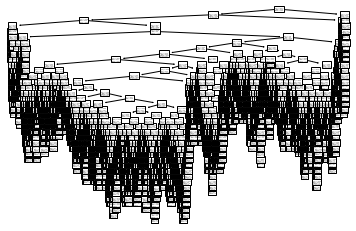

In [25]:
tree.plot_tree(rgrs)

The nature of the presented decision tree is due to the enormous number of samples in both our training and test datasets. and the anticipated value has been segregated with an accuracy of 76.3237%